In [6]:
from bs4 import BeautifulSoup
import requests
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import numpy as np
import pickle
import pylab
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

%matplotlib inline

In [7]:
link = 'http://164.100.47.194/Loksabha/Debates/DebateAdvSearch15.aspx'
contents = requests.get(link).content
soup = BeautifulSoup(contents, 'html.parser')

In [8]:
types_of_debates = {}

records = soup.find('select', id = 'ContentPlaceHolder1_ddldebtype')
for option in records.find_all('option'):
    types_of_debates[option.text] = option['value']
    
types_of_debates.pop('--- Select Debate Type ---', None)

'--- Select Debate Type ---'

In [9]:
debate_graphs = {}
for key in types_of_debates:
    debate_graphs[key] = {}

types_of_debates

{'ADDRESS BY THE CHAIR (RULE - 360)': '66',
 'ADJOURNMENT MOTION': '1',
 'ANNOUNCEMENT BY THE CHAIR': '2',
 'ARREST OF MEMEBRS': '57',
 'ASSENT TO BILLS': '3',
 'BUDGET (GENERAL)': '4',
 'BUDGET (RAILWAYS)': '6',
 'BUDGET (STATES)': '5',
 'BUSINESS OF HOUSE': '7',
 'CALLING ATTENTION (RULE-197)': '8',
 'DECISION BY THE CHAIR': '12',
 'DISCUSSION ON SPECIAL SITTING': '67',
 'ELECTION OF SPEAKER/DY. SPEAKER': '58',
 'ELECTION TO COMMITTEES/BOARDS': '59',
 'EXPULSION FROM MEMBERSHIP OF LOK SABHA': '0',
 'FELICITATIONS': '13',
 'GOVERNMENT BILLS': '14',
 'GOVERNMENT MOTION': '15',
 'GOVERNMENT RESOLUTIONS': '16',
 'HALF-AN-HOUR DISCUSSIONS (RULE-55)': '17',
 'INTRODUCTION OF MINISTERS': '19',
 'INTRODUCTION OF PARLIAMENTARY DELEGATIONS': '56',
 'LEAVE OF ABSENCE': '20',
 'MATTERS UNDER RULE-377': '21',
 'MESSAGES FROM PRESIDENT': '23',
 'MESSAGES FROM RAJYA SABHA': '24',
 "MOTION OF THANKS ON THE PRESIDENT'S ADDRESS": '26',
 'MOTION TO CONSIDER POLICY, SITUATION, STATEMENT OR ANY OTHER MAT

In [123]:
debate_name = 'CALLING ATTENTION (RULE-197)'
f = open('../Data/Debates/' + debate_name + '.htm')
contents = f.read()
soup = BeautifulSoup(contents, 'html.parser')
f.close()

In [124]:
records = soup.find_all('td')
filtered_records = [rec.find_next_sibling('td') for rec in records if 'Participants:' in rec.text]
debate_participants = []

for rec in filtered_records:
    current_participants = rec.find_all('a')
    debate_participants.append(set([p.text for p in current_participants]))

In [125]:
f = open('../Data/members_of_parliament.htm')
contents = f.read()
f.close()
soup = BeautifulSoup(contents, 'html.parser')

In [126]:
table_of_contents = soup.find_all('td')
members = []
for rec in table_of_contents:
    text = rec.text.strip().replace(',', ' ')
    text = text.split()
    if 'Shri' in text:
        text.remove('Shri')
    elif 'Smt.' in text:
        text.remove('Smt.')
    elif 'Dr.' in text:
        text.remove('Dr.')
    text = ' '.join(text)
    members.append(text)
    
members = members[5:]
member_details = {}
n = len(members)

for i in range(0, n, 3):
    member_details[members[i]] = (members[i + 1], members[i + 2])
    

In [127]:
parties = []

for rec in member_details:
    if member_details[rec][0] not in parties:
        parties.append(member_details[rec][0])

In [128]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffff']

parties = list(parties)

color_map = {}

for i in range(len(parties)):
    color_map[parties[i]] = colors[i]

In [129]:
G = nx.Graph()
nodes = set([])

for rec in debate_participants:
    for p in rec:
        text = p.split()
        if 'Shri' in text:
            text.remove('Shri')
        elif 'Smt.' in text:
            text.remove('Smt.')
        elif 'Dr.' in text:
            text.remove('Dr.')
        text = ' '.join(text)
        nodes.add(text)
        
nodes = list(nodes)

In [130]:
candidate_color = []
name_map = {}

for rec in nodes:
    if rec in member_details:
        candidate_color.append(color_map[member_details[rec][0]])
        name_map[rec] = rec
    elif rec == 'Singh Alias Pappu Singh Uday':
        candidate_color.append(color_map[member_details['Ranjan (Pappu Yadav) Rajesh'][0]])
        name_map[rec] = 'Ranjan (Pappu Yadav) Rajesh'
    elif rec == 'De Ratna':
        candidate_color.append(color_map[member_details['De(Nag) (Smt.) Ratna'][0]])
        name_map[rec] = 'De(Nag) (Smt.) Ratna'
    elif rec == 'Patel Devji':
        candidate_color.append(color_map[member_details['Patel Devji Mansingram'][0]])
        name_map[rec] = 'Patel Devji Mansingram'
    elif rec == 'Ray Saugata':
        candidate_color.append(color_map[member_details['Roy Prof. Saugata'][0]])
        name_map[rec] = 'Roy Prof. Saugata'
    elif rec == 'Chanabasappa Udasi Shivkumar':
        candidate_color.append(color_map[member_details['Udasi Shivkumar Chanabasappa'][0]])
        name_map[rec] = 'Udasi Shivkumar Chanabasappa'
    elif rec == 'Narayanasamy V.': 
        candidate_color.append(color_map[member_details['Ramachandran Krishnan Narayanasamy'][0]])  
        name_map[rec] = 'Ramachandran Krishnan Narayanasamy'
    elif rec == 'Dastidar Kakli Ghosh':
        candidate_color.append(color_map[member_details['Dastidar (Smt.) Kakoli Ghosh'][0]])
        name_map[rec] = 'Dastidar (Smt.) Kakoli Ghosh'
    elif rec == 'Thambidurai M.':
        candidate_color.append(color_map[member_details['Thambi Durai M.'][0]])
        name_map[rec] = 'Thambi Durai M.'
    elif rec == 'Thomas Prof. K.V.':
        candidate_color.append(color_map[member_details['Thomas Prof. Kuruppassery Varkey'][0]])
        name_map[rec] = 'Thomas Prof. Kuruppassery Varkey'
    elif rec == 'Pandurang Munde Gopinathrao':
        candidate_color.append(color_map[member_details['Munde Pritam Gopinath'][0]])
        name_map[rec] = 'Munde Pritam Gopinath'
    elif rec == 'Agarwal Rajendra':
        candidate_color.append(color_map[member_details['Agrawal Rajendra'][0]])
        name_map[rec] = 'Agrawal Rajendra'
    elif rec == 'Azad Kirti (Jha)':
        candidate_color.append(color_map[member_details['Azad Kirti (JHA)'][0]])
        name_map[rec] = 'Azad Kirti (JHA)'
    else:
        name_map[rec] = rec
        candidate_color.append('#5E5C51')
    
nodes = [name_map[rec] for rec in nodes]
    
G.add_nodes_from(nodes)

In [139]:
edge_weights = {}

for rec in debate_participants:
    for p1 in rec:
        for p2 in rec:
            if p1 == p2:
                continue
            text1 = p1.split()
            if 'Shri' in text1:
                text1.remove('Shri')
            elif 'Smt.' in text1:
                text1.remove('Smt.')
            elif 'Dr.' in text1:
                text1.remove('Dr.')
            text1 = ' '.join(text1)
            text2 = p2.split()
            if 'Shri' in text2:
                text2.remove('Shri')
            elif 'Smt.' in text2:
                text2.remove('Smt.')
            elif 'Dr.' in text2:
                text2.remove('Dr.')
            text2 = ' '.join(text2)
            if (name_map[text1], name_map[text2]) in edge_weights:
                edge_weights[(name_map[text1], name_map[text2])] += 0.5 # 0.5 because each edge will be encountered twice
            elif (name_map[text2], name_map[text1]) in edge_weights:
                edge_weights[(name_map[text2], name_map[text1])] += 0.5
            else:
                edge_weights[(name_map[text1], name_map[text2])] = 0.5
                
edges = []

for e in edge_weights:
    edges.append((e[0], e[1], edge_weights[e]))

In [140]:
G.add_weighted_edges_from(edges)

In [141]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

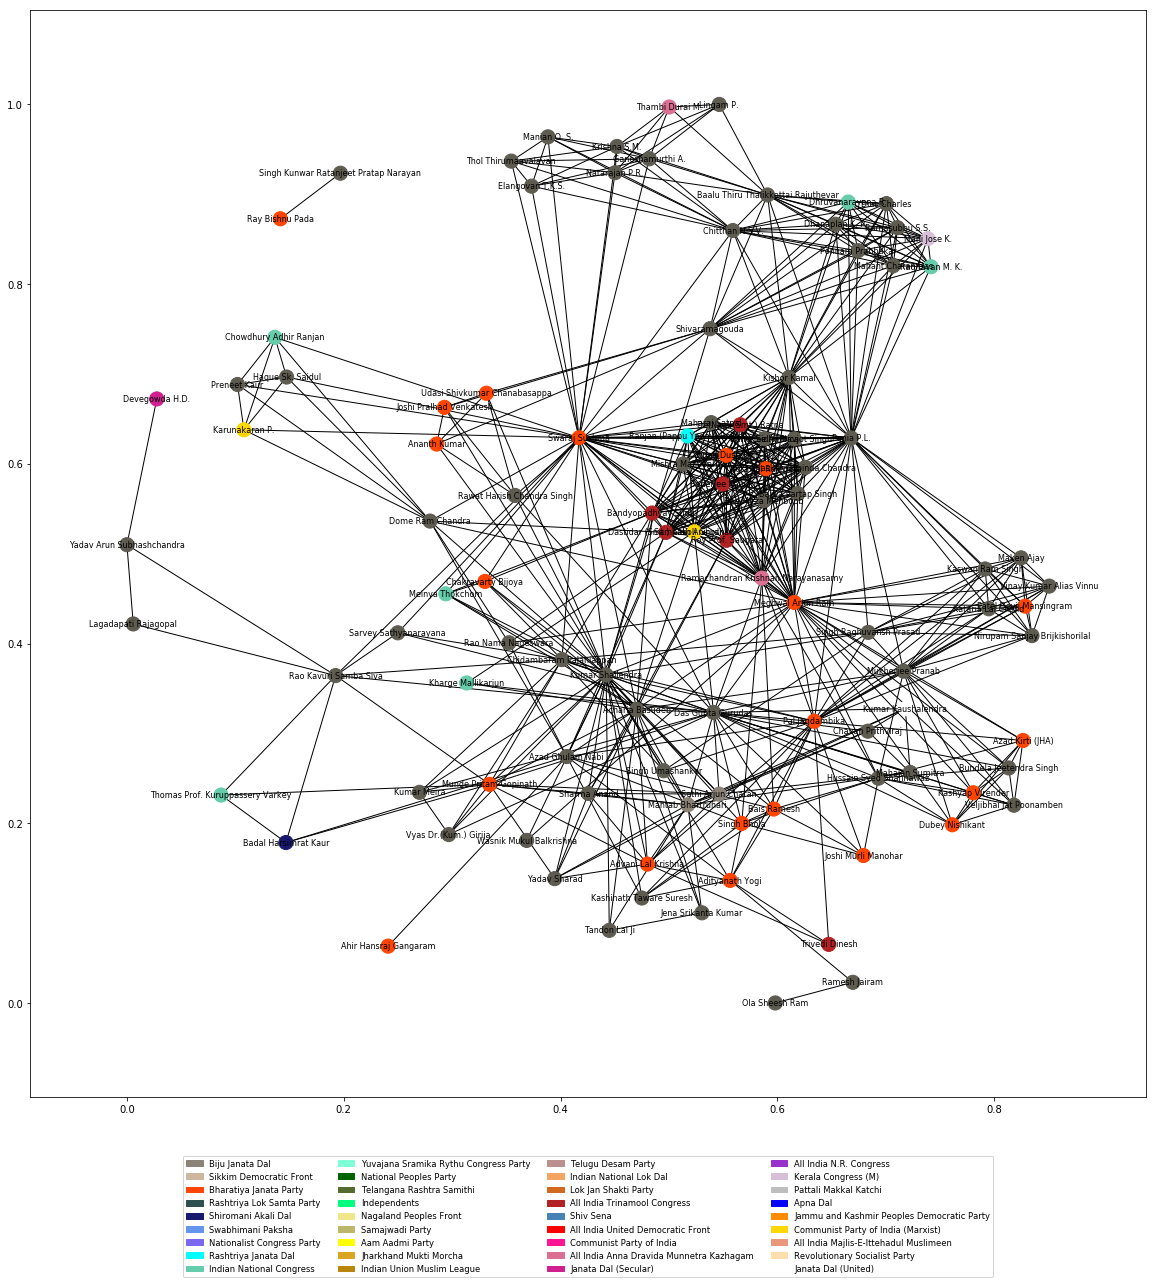

In [142]:
#fig = plt.figure()
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


pos = nx.fruchterman_reingold_layout(G)

pylab.figure(1, figsize = (20, 20))
nx.draw_networkx(G, pos, with_labels = True, node_color = candidate_color, node_size = 200, font_size = 8, label = 'abcd')
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 4)

#nx.draw_graphviz(G, with_labels = True, layout = 'random_layout')
plt.savefig('interaction_graph.png')

In [269]:
nx.write_graphml(G, 'network.graphml')

In [270]:
f = open('candidates_color.pickle', 'wb')
pickle.dump(candidate_color, f, protocol = 2)
f.close()

In [271]:
f = open('edges.pickle', 'wb')
pickle.dump(edges, f, protocol = 2)
f.close()

In [272]:
f = open('parties.pickle', 'wb')
pickle.dump(color_map, f, protocol = 2)
f.close()

In [273]:
f = open('nodes.pickle', 'wb')
pickle.dump(nodes, f, protocol = 2)
f.close()

In [274]:
f = open('member_details.pickle', 'wb')
pickle.dump(member_details, f, protocol = 2)
f.close()